# UNTREF
# INGENIERÍA DE SONIDO
## SEÑALES Y SISTEMAS 
### Marzo 2021


# PRÁCTICA 4: CONVOLUCION DE SEÑALES CONTINUAS


### OBJETIVO

En esta práctica se pretende reforzar el concepto de la convolución como mecanismo para conocer la salida de un sistema, dada su respuesta impulsiva y la entrada. 

### OBJETIVOS ESPECIFICOS:

* Obtener la convolución de diferentes señales y comparar los resultados prácticos con los teóricos.
* Recuperar una señal de audio (música) que se encuentra mezclada con otra (señal de voz masculina), a través de la convolución con la respuesta al impulso de un filtro.


## PREPARACIÓN PREVIA A LA PARTE EXPERIMENTAL

### Parte A

Usando los resultados rápidos de la convolución de pulsos de igual o diferente duración, dibuje la gráfica de la convolución teórica de los pulsos que se definen a continuación:

\begin{equation}
    p_1(t)= \Pi \bigg(\frac{t-0.25}{0.5}\bigg)           
\end{equation}

\begin{equation}
    p_2(t)= \Pi(t)
\end{equation}

Debe hacer las siguientes operaciones: 
* $p_1*p_1$
* $p_1* p_2$  
* $p_2*p_2$

> Nota: **No** tiene que desarrollar todas las integrales de convolución; **basta con graficar cada salida con sus voltajes y duraciones precisas**. Recuerde que convolucionar dos pulsos de bases diferentes produce un trapecio y si tiene bases idénticas produce un triángulo. Puede seguir la **receta general de convolucionar dos pulsos rectangulares.**

### Parte B

Calcular analíticamente  la convolución (TODAS LAS INTEGRALES EN DETALLE) de la función  $x(t)=t^2 \quad (0<t<1 seg) \quad$ con el pulso $p_1(t)$ anteriormente definido. Debe definir cada intervalo de la convolución, encontrar las expresiones de $y(t)$ en cada intervalo y graficarlo. Debe incluir una imagen con las expresiones matemáticas de la convolución en las diferentes zonas en el script de la Parte Experimental 1

## PARTE EXPERIMENTAL 1

En primer lugar, basados en la función generador, haremos uso de la función llamada **generador2021**. En esta se amplía el tipo de funciones generadas y, para el pulso rectangular y triangular podremos suministrar el ancho en segundos (en vez de en muestras). Con ella se pueden generar: Sinusoides, Pulsos periódicos, Diente de Sierra, Sinc, Pulso rectangular, Pulso Triangular, Chirp, escalón, signo, exponenciales unilaterales y bilaterales. Se les suministra el código. 


Cuando se realiza la cnvolución de dos señales, el resultado es una nueva señal mas larga que las dos originales. Generaremos dos señales ($x_1$ y $x_2$) con el mismo vector de tiempo $t$

In [1]:
import numpy as np
from generador2021 import generador2021 as generador
import matplotlib.pyplot as plt
import fftplot

fs=1000;
Ts=1/fs;
t=np.arange(-2,2,Ts);  # interval de tiempo entre (-2,2)


Para no restringir la ocupación de $x_1$ y $x_2$, generaremos un vector para la convolución ($y$), más largo


In [2]:
ty = np.arange(-4, 4-Ts, Ts)

Así podemos graficar adecuadamente la convolución $x_1*x_2$

. Para realizar la convolución, usaremos la función **convolve**  de Numpy. En el computador se realiza una convolución discreta (sumando), es por esto que para aproximarnos a la integral de convolución multiplicaríamos la suma por la distancia entre muestras. Es como si estuviésemos integrando rectángulos de base $1/f_s=t_s$.

```
y = (1/fs)*np.convolve(x1,x2)
```

A continuación haremos los siguientes experimentos

**Experimento 1.** Se genera un pulso rectangular que representará a la señal $p_1(t)$ de la preparación, usando la función **generador2021** que se le suministra. 

La forma de invocar la función **generador2021** para que nos devuelva un **pulso rectangular** centrado en el origen, de amplitud unitaria y de ancho=0.5 es la siguiente:

In [3]:
x1 = generador(t, fs, tipo=5)

La señal $p_1(t)$ sería igual a $x_1$ desplazada $0.25 seg$. Debe usar la función desplaza. Como ya fue creada en la práctica 2, sólo debe copiar la función en un archivo `.py`, guardarlo en la carpeta donde está realizando la práctica e importarlo. Se recomienda hacer un archivo con las tres funciones (desplaza, girodespaza y desplazagiro) al que podemos llamar `manipulacion.py`. Luego podemos importar la función de este archivo en nuestro código. 

In [4]:
from manipulacion import desplaza

p1 = desplaza(x1, fs, 0.25)

Para construir $p_2$ se debe llamar a la función generador pero con ancho=1. No haría falta desplazarla.

**Haga las convoluciones entre estos pulsos pedidas en la preparación**. Verifique si la forma, duración y amplitud de las convoluciones son correctas, es decir, si coinciden con los valores teóricos. Para cada caso utilice subplot para que muestre las dos señales y su convolución. Se le sugiere que use la librería **matplotlib**, que tiene muchas funciones, similares a las que usa MATLAB, para modificar diferentes atributos al graficar. Por ejemplo, luego de importar la librería con `import matplotlib.pyplot as plt`, cuando desee graficar $p_2$, podría hacer lo siguiente:

(-1.0, 1.0)

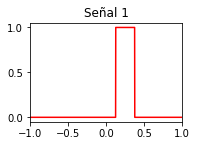

In [5]:
plt.figure()
ax1 = plt.subplot(221)  # Se abre una hoja con 2 filas y 2 columnas, en la primera se grafica p1    
ax1.plot(t, p1,'r')   # Se grafica
ax1.set_title('Señal 1')  # Se coloca un título a la función
plt.xlim(-1, 1)   


La última instrucción ( `plt.xlim(-1, 1)` ) le permite limitar la zona de tiempo (porque las abscisas $x$, en este caso representa el tiempo), para observarla con mayor precisión. Puede hacerlo también con $y$ (las ordenadas). En ocasiones los ejes o etiquetas de los gráficos se superponen. Puede usarse la siguiente instrucción para crear separación entre las gráficas del subplot.

In [6]:
plt.subplots_adjust(wspace = 0.5,hspace=0.4)   # revise el help(plt.subplots_adjust)

<Figure size 432x288 with 0 Axes>

**Experimento 2.** Genere y grafique una señal $x(t)=t^2 \quad (0<t<1 seg) \quad$ usando el mismo vector de tiempo de la parte anterior `t=np.arange(-2,2,Ts)`. Como el pulso $p_1$ es de ancho unitario, puede desplazarlo 0.5 segundos para que le quede ubicado entre 0 y 1. Luego lo multiplica por $t^2$ y obtendrá la señal cuadrática solo entre 0 y 1. 

**Experimento 3.** Haga la convolución  de $x(t)$ y $p_1(t)$. Esta se llamará $y(t)$. Compare con el valor teórico que usted tiene en su preparación. Debe verificar los resultados evaluando $y(t)$ en varios instantes de tiempo.

## PARTE EXPERIMENTAL 2

Pretendemos recuperar una señal de audio (música *ParaElisa2.wav*) que se encuentra mezclada con otra (señal de voz masculina *VozHombre.wav*), a través de la **convolución con la respuesta al impulso de un filtro**.
Para poder entender el experimento, necesitaremos usar una función que permita **visualizar las señales en frecuencia**. Usaremos la función `graficar_fft` del archivo `fftplot`, soportada por la función `fft` de Scipy, y que se le suministra. Es necesario guardarla en el mismo directorio e invocarla de la siguiente forma, para el caso de usa señal $y$.

```.py
y_frec = fftplot.graficar_fft(y, fs, N)
```

La función `graficar_fft` funciona con los siguientes argumentos:

* x: es la señal a la que se le desea hallar la FFT

* fs: es la frecuencia de muestreo de la senal original

* objeto_ax (opcional): es una instancia de un contenedor gráfico para poder
graficar subplots.

* N (opcional): es el numero de puntos de la fft, debe ser una potencia de 2,
de no ser asi, el algoritmo corrige tal que N es la proxima 
potencia de 2 mas cercana al N proporcionado por el usuario

* title (opcional): texto para incluir como titulo del gráfico

* log (opcional): recibe un valor booleano, por defecto toma un valor False y el gráfico generado es lineal, usando True como valor el argumento se puede hacer un gráfico logarítmico.

En el caso anterior sólo usamos 3 argumentos: `x`, `fs` y `N`. Los primeros 2 son obligatorios y el tercero es opcional. EL valor de `N`, que es la cantidad de muestras de la FFT será convertido a una potencia de 2 dentro de la función, si sucede que se pasa un número que no cumple con esa condición. Si observa el archivo **fftplot.py**, verá que tiene una función `proxima_potencia_de_2(numero)` que transforma un número a la potencia de 2 más cercana de mayor valor. Esta función es invocada dentro de `graficar_fft` para transformar el `N` que se recibe como argumento. 

Se pueden usar los otros dos argumentos opcionales de la función `graficar_fft` para personalizar las gráficas. El argumento `objeto_ax` recibe un objeto `axes` sobre el cual vamos a graficar, en caso de que estemos usando subplots. Cada vez que graficamos estamos creando un objeto `axes`, que es un contenedor del gráfico que vamos a realizar. Cuando usamos subplots podemos generar varios plots y referenciarlos como `ax1`, `ax2`, ... De esta manera es posible hacer uso de la función `graficar_fft` mpdificada que recibe como argumento extra el objeto `axes` sobre el que queremos graficar.

El último argumento, `title`, sirve para añadir un texto como título del gráfico.

A continuación, usaremos `scipy.io.wavfile` para almacenar audio en un array (`write`) desde un archivo wav y leerlo (`read` ) :

 * Importar el módulo `wavfile`, use la siguiente convención: `import scipy.io.wavfile as wav` 
 * Leer los archivos **.wav**:   `fs1, audio_signal = wav.read('ParaElisa2.wav')`
 * Convertirlos a float para poder manipularlos:  `audio_signal = audio_signal.astype(np.float32, order='C') / 32768.0`
 * Normalizar sus valores para que tengan un rango similar de amplitudes. Se muestra un ejemplo. Se determina la potencia de la señal, y luego se normalizan sus amplitudes:
 ```.py
pot1 = np.mean(audio_signal**2)
audio_signal = audio_signal / np.sqrt(pot1)
t1 = np.arange(0, audio_signal.size / fs1, 1 / fs1)
 ```
 
 * Verlos en tiempo y en frecuencia. Se muestra un ejemplo.
 ```
fig, ax2 = plt.subplots()                
ax2.plot(t1, audio_signal)
N = np.size(audio_signal)
#Se aplica fft y se grafica en frecuencia
audio1_frec = fftplot.graficar_fft(audio_signal, fs1, N, title='Para Elisa')
 ```

Observe si a la hora de graficar el espectro es conveniente usar escala lineal o logarítmica. Para cambiar de escala con la función `graficar_fft` recuerde que debe agregar el argumento `log = True`

In [7]:
import scipy.io.wavfile as wav

fs1, audio_signal = wav.read('ParaElisa2.wav')

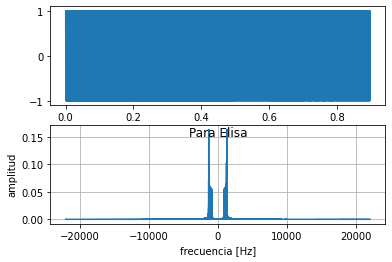

In [8]:
audio_signal = audio_signal.astype(np.float32, order='C') / 32768.0
audio_signal = audio_signal / np.max(np.abs(audio_signal))
t1 = np.arange(0, audio_signal.size / fs1, 1 / fs1)
fig, (ax1, ax2) = plt.subplots(2,1)                
ax1.plot(t1, audio_signal)
N = np.size(audio_signal)
#Se aplica fft y se grafica en frecuencia
audio1_frec = fftplot.graficar_fft(audio_signal, fs1, N, objeto_ax = ax2, title='Para Elisa')

Luego de visualizar cada audio en tiempo y frecuencia y oírlos, se sumarán. Como ya están convertidos a float, conviene sumar los arrays y usar `sd.play()` para escucharlos. Nuevamente se escucha la señal suma y se visualiza en tiempo y en frecuencia.

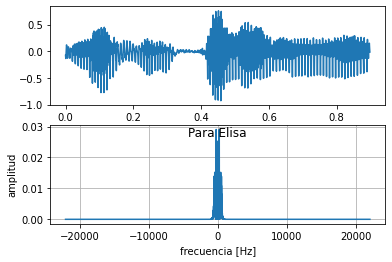

In [9]:
import scipy.io.wavfile as wav
import sounddevice as sd

fs2, audio_signal2 = wav.read('VozHombre.wav')
audio_signal2 = audio_signal2.astype(np.float32, order='C') / 32768.0
audio_signal2 = audio_signal2 / np.max(np.abs(audio_signal))
t2 = np.arange(0, audio_signal2.size / fs2, 1 / fs2)

fig, (ax1,ax2) = plt.subplots(2,1)                
ax1.plot(t2, audio_signal2)
N2 = np.size(audio_signal2)
#Se aplica fft y se grafica en frecuencia
audio2_frec = fftplot.graficar_fft(audio_signal2, fs2, N2, objeto_ax=ax2, title='Para Elisa')

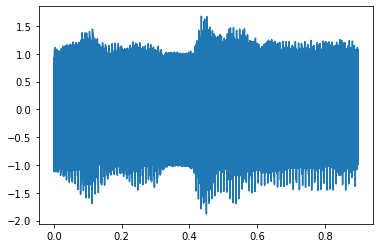

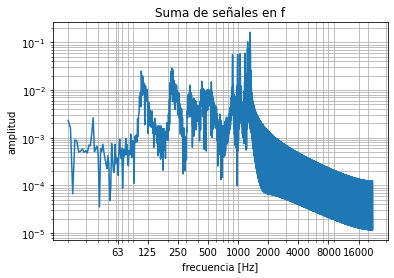

In [10]:
y = audio_signal + audio_signal2
plt.plot(t1,y)
N = np.size(y)
yfrec = fftplot.graficar_fft(y,fs1,N, title = 'Suma de señales en f', log=True); 
#Para oir la suma de las dos, la guardo en un archivo .wav y uso playsound
wav.write('Suma.wav', fs2, y)
sd.play(y)   # se reproduce  la señal


A continuación se generan los coeficientes de dos tipos de filtros: uno tipo **Butterworth pasabajo** que permitiría extraer de la señal suma la señal de voz (fcorte=750Hz) y un **filtro pasabanda Cheby1**, con el cual usted rescatará la melodía sin la voz (750 Hz - 1500 Hz). Es necesaria la librería signal de scipy ( `from scipy import signal` )


In [11]:
from scipy import signal

#Diseño del filtro
fc = 600  # frecuencia de corte del filtro
wc = fc / (0.5*fs2)  # frecuencia normalizada para el filtro digital
fp = [750,1500]     # Banda para filtros Bandpass/Bandstop
arraysr=np.array(0.5*fs2)
wp = fp / arraysr      # Banda normalizada para el filtro digital
rp=1     #Máximo ripple, en dB (chebyshev1, ellip)
rs=30     #Mínima atenuación en banda rechazada, en dB (chebyshev2, ellip)
# se obtienen los coeficientes de la función de transferencia del filtro
# Butterworth lowpass
b1, a1 = signal.butter(N=5, Wn=wc, btype='low')
# Chebyshev 2 Bandpass
b11, a11 = signal.cheby2(N=5, rs=rs, Wn=wp, btype='band')


Para observar la respuesta en frecuencia de ambos filtros, se usa `freqz` de la librería signal

In [12]:
w1, h1 = signal.freqz(b1,a1)
w11, h11 = signal.freqz(b11,a11)

Para graficarla podemos usar `subplot`

Para filtrar las señales se convoluciona la respuesta impulsiva de cada filtro con la señal suma. Debe mostrar las respuestas en frecuencia de dichos filtros y las respuestas impulsivas. Existen diversas formas. En este caso usaremos la función `filtfilt`
Por ejemplo:


In [13]:
y_filtbutter2 = signal.filtfilt(b1, a1, y)  # Donde y es la suma de las dos señales

Con este filtraje estaríamos rescatando la señal de voz. Para rescatar la música usaríamos el filtro pasabanda. Haga los dos experimentos.

La señal de salida de los filtros tienen formato `float64`. Para oir cualquiera de estas dos señales, hay que cambiar el formato a `float32`.

In [14]:
y_filtbutter2 = y_filtbutter2.astype(np.float32, order='C')

Luego se procede a guardar la señal en format wav para luego oirla.

In [15]:
wav.write('Voz.wav', fs1, y_filtbutter2)
sd.play(y_filtbutter2)   # se reproduce  la señal de Voz